In [1]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

# Dogecoin and Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [2]:
base = 'https://api.coingecko.com/api/v3/'

In [3]:
url = base + 'coins/bitcoin/market_chart?vs_currency=usd&days=30'

In [4]:
result = requests.get(url)
j_bc = result.json()

In [5]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc.head(10)

,time,price
0,1569664053451,8212.507049
1,1569668743622,8191.227820
2,1569672835328,8136.057231
3,1569677035917,8089.215503
4,1569681139199,8102.802070
5,1569686047709,8077.354512
6,1569689828177,8119.876321
7,1569694020179,8143.360271
8,1569698087957,8136.030073
9,1569702266744,8144.571785


In [6]:
url = base + 'coins/dogecoin/market_chart'


In [7]:
param_dict = { 'id':'dogecoin', 'vs_currency':'usd', 'days':30}


In [8]:
result = requests.get(url, params=param_dict)


In [9]:
j_dc = result.json()
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc.head(10)

,time,price
0,1569664050696,0.002200
1,1569668738850,0.002206
2,1569672834910,0.002183
3,1569677018776,0.002181
4,1569681142333,0.002174
5,1569685802054,0.002180
6,1569689825953,0.002186
7,1569694013931,0.002211
8,1569698082568,0.002203
9,1569702261230,0.002201


In [10]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc['time'] = pd.to_datetime(df_bc['time'], unit='ms')

In [11]:
df_bc.set_index('time', inplace=True)
df_bc.head(10)

,price
time,
2019-09-28 09:47:33.451,8212.507049
2019-09-28 11:05:43.622,8191.227820
2019-09-28 12:13:55.328,8136.057231
2019-09-28 13:23:55.917,8089.215503
2019-09-28 14:32:19.199,8102.802070
2019-09-28 15:54:07.709,8077.354512
2019-09-28 16:57:08.177,8119.876321
2019-09-28 18:07:00.179,8143.360271
2019-09-28 19:14:47.957,8136.030073


In [12]:
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc['time'] = pd.to_datetime(df_dc['time'], unit='ms')

df_dc.set_index('time', inplace=True)
df_dc.head(10)

,price
time,
2019-09-28 09:47:30.696,0.002200
2019-09-28 11:05:38.850,0.002206
2019-09-28 12:13:54.910,0.002183
2019-09-28 13:23:38.776,0.002181
2019-09-28 14:32:22.333,0.002174
2019-09-28 15:50:02.054,0.002180
2019-09-28 16:57:05.953,0.002186
2019-09-28 18:06:53.931,0.002211
2019-09-28 19:14:42.568,0.002203


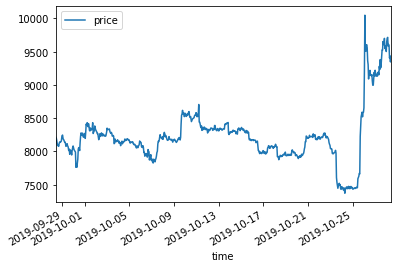

In [13]:
df_bc.plot()

![logo](Dogecoin_logo.png)

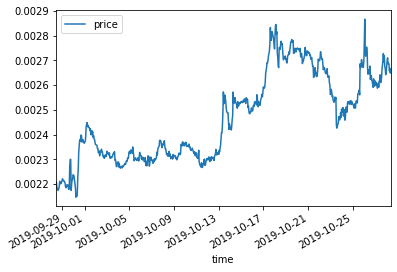

In [15]:
df_dc.plot()

# top ten coins report

In [16]:
url = base + 'coins/list'

In [17]:
result = requests.get(url)
j = result.json()

df_list = pd.DataFrame(j)
df_list.head(10)

,id,name,symbol
0,01coin,01coin,zoc
1,02-token,O2 Token,o2t
2,0chain,0chain,zcn
3,0x,0x,zrx
4,0xcert,0xcert,zxc
5,0xdark,0xDark,oxd
6,10m-token,10M Token,10mt
7,12ships,12Ships,TSHP
8,1337,Elite,1337
9,1irstcoin,1irstcoin,fst


In [18]:
data_df = df_list.iloc[:10, 0]
data_df

0       01coin
1     02-token
2       0chain
3           0x
4       0xcert
5       0xdark
6    10m-token
7      12ships
8         1337
9    1irstcoin
Name: id, dtype: object

In [19]:
data_list = []

for i in data_df:
    base = "http://api.coingecko.com/api/v3/coins/"
    url = base + i + "/market_chart?vs_currency=usd&days=300"
    result = requests.get(url)
    data = result.json()
    data_df = pd.DataFrame(data['prices'], columns = ['date_time','price'])
    data_df["file_name"] = i
    data_list.append(data_df)

data_series = pd.concat(data_list)
data_series

,date_time,price,file_name
0,1546387200000,0.006260,01coin
1,1546473600000,0.006419,01coin
2,1546560000000,0.006019,01coin
3,1546646400000,0.005852,01coin
4,1546732800000,0.006123,01coin
5,1546819200000,0.005920,01coin
6,1546905600000,0.005860,01coin
7,1546992000000,0.006139,01coin
8,1547078400000,0.006117,01coin
9,1547164800000,0.005119,01coin


In [20]:
data_df.set_index('date_time', inplace=True)

In [21]:
data_df.head()

,price,file_name
date_time,,
1551312000000,5.741111,1irstcoin
1551398400000,6.492383,1irstcoin
1551484800000,7.120197,1irstcoin
1551571200000,0.264534,1irstcoin
1551657600000,0.288492,1irstcoin


In [22]:
data_df.to_csv('top_ten_report.csv')

In [24]:
check = pd.read_csv('top_ten_report.csv')
check

,date_time,price,file_name
0,1551312000000,5.741111,1irstcoin
1,1551398400000,6.492383,1irstcoin
2,1551484800000,7.120197,1irstcoin
3,1551571200000,0.264534,1irstcoin
4,1551657600000,0.288492,1irstcoin
5,1551744000000,0.287760,1irstcoin
6,1551830400000,0.294154,1irstcoin
7,1551916800000,0.304186,1irstcoin
8,1552003200000,0.310898,1irstcoin
9,1552089600000,0.310898,1irstcoin
